# Polynomial and ANN regression
Algorthim to apply polynomial and ANN regression models to a set of COVID-19 data in the period of the first UK lockdown (23rd March 2020 - 1st June 2020). Subsequent analysis will result in a predictions of the day by day death toll following the lockdown. 

In [1]:
#Required imports for the algorithm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Reading in data
data = pd.read_excel('Covid-19_running_total.xlsx')
data

,Date,Day,Total,0-19,20-39,40-59,60-79,80+
0,2020-04-02,0,561,0,7,34,244,276
1,2020-04-03,1,1165,0,11,75,466,613
2,2020-04-04,2,1802,2,17,124,724,935
3,2020-04-05,3,2357,2,21,170,946,1218
4,2020-04-06,4,2760,2,23,195,1122,1418
...,...,...,...,...,...,...,...,...
57,2020-05-29,57,24277,13,168,1929,9284,12883
58,2020-05-30,58,24423,13,168,1935,9339,12968
59,2020-05-31,59,24508,13,168,1940,9372,13015
60,2020-06-01,60,24616,13,169,1948,9416,13070


In [2]:
#Column variables
date = data['Date']
day = data['Day']
total = data['Total']
band1 = data['0-19']
band2 = data['20-39']
band3 = data['40-59']
band4 = data['60-79']
band5 = data['80+']

shuf = data.sample(frac=1)
train_size = int(0.7 * len(data))

data_train = shuf[:train_size]
data_test = shuf[train_size:]

data_train.sort_values(by=['Day'], inplace=True)
data_test.sort_values(by=['Day'], inplace=True)

date_train = data_train['Date']
date_test = data_test['Date']

day_train = data_train['Day']
day_test = data_test['Day']

total_train = data_train['Total']
total_test = data_test['Total']

band1_train = data_train['0-19']
band1_test = data_test['0-19']

band2_train = data_train['20-39']
band2_test = data_test['20-39']

band3_train = data_train['40-59']
band3_test = data_test['40-59']

band4_train = data_train['60-79']
band4_test = data_test['60-79']

band5_train = data_train['80+']
band5_test = data_test['80+']

pred_days = day.to_numpy()
for i in range(30):
    d = 61 + i
    pred_days = np.append(pred_days,d)
np.size(band1_test), np.size(band1_train)


<ipython-input-2-460a6e736965>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train.sort_values(by=['Day'], inplace=True)
<ipython-input-2-460a6e736965>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test.sort_values(by=['Day'], inplace=True)


(19, 43)

# Preliminary analysis

In [3]:
data_mat= data.to_numpy()
#Mean of each feature

Mean_vals = []
#Loops through each feature appending output array 
for i in range (2,8):
    Mean_vals = np.append(Mean_vals,np.mean(data_mat[:,i]))
    
#Rounds ansers    
Mean_vals = np.round(Mean_vals, decimals=3)
#Stops exponential outputs
np.set_printoptions(suppress=True) 
#Output
Mean_vals

array([16405.048,     7.581,   118.871,  1304.661,  6373.532,  8600.403])

In [4]:
#Standard deviation of each feature
SD_vals = []
for i in range (2,8):
    SD_vals = np.append(SD_vals,np.std(data_mat[:,i]))

SD_vals = np.round(SD_vals, decimals=3)
SD_vals

array([7323.952,    3.744,   50.176,  597.387, 2779.131, 3895.13 ])

In [5]:
#Minimum of each feature
Min_vals = []
for i in range (2,8):
    Min_vals = np.append(Min_vals,np.amin(data_mat[:,i]))

Min_vals = np.round(Min_vals, decimals=3)
Min_vals

array([561.,   0.,   7.,  34., 244., 276.])

In [6]:
#Maximum of each feature
Max_vals = []
for i in range (2,8):
    Max_vals = np.append(Max_vals,np.amax(data_mat[:,i]))
    
Max_vals = np.round(Max_vals, decimals=3)
Max_vals

array([24759.,    13.,   172.,  1958.,  9461., 13155.])

In [7]:
#Median of each feature
Median_vals = []
for i in range (2,8):
    Median_vals = np.append(Median_vals,np.median(data_mat[:,i]))

Median_vals = np.round(Median_vals, decimals=3)
Median_vals

array([18879.5,     8. ,   135. ,  1523.5,  7352.5,  9860.5])

In [8]:
#Stats import to use mode
from scipy import stats

Mode_vals = []
for i in range (2,8):
    tmp = []
    tmp = stats.mode(data_mat[:,i])
    Mode_vals = np.append(Mode_vals,tmp.mode)

Mode_vals

array([561, 5, 167, 34, 244, 276], dtype=object)

In [9]:
data.corr()

,Day,Total,0-19,20-39,40-59,60-79,80+
Day,1.000000,0.959130,0.985538,0.948548,0.953609,0.953938,0.963393
Total,0.959130,1.000000,0.951453,0.998046,0.999611,0.999793,0.999864
0-19,0.985538,0.951453,1.000000,0.944393,0.945484,0.947421,0.954894
20-39,0.948548,0.998046,0.944393,1.000000,0.998020,0.998606,0.997262
40-59,0.953609,0.999611,0.945484,0.998020,1.000000,0.999559,0.999246
60-79,0.953938,0.999793,0.947421,0.998606,0.999559,1.000000,0.999332
80+,0.963393,0.999864,0.954894,0.997262,0.999246,0.999332,1.000000


# Predictive Modelling
## Total

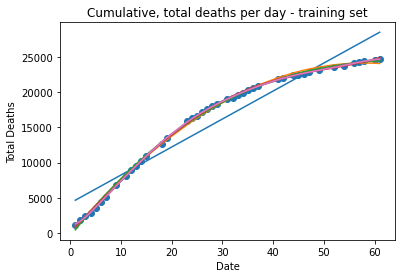

In [10]:
#Training total
deg_1 = np.poly1d(np.polyfit(day_train,total_train,1))
deg_2 = np.poly1d(np.polyfit(day_train,total_train,2))
deg_3 = np.poly1d(np.polyfit(day_train,total_train,3))
deg_4 = np.poly1d(np.polyfit(day_train,total_train,4))
deg_5 = np.poly1d(np.polyfit(day_train,total_train,5))
deg_7 = np.poly1d(np.polyfit(day_train,total_train,7))
deg_10 = np.poly1d(np.polyfit(day_train,total_train,10))


#plt.bar(x,y)
plt.scatter(day_train,total_train)
plt.plot(day_train,deg_1(day_train))
plt.plot(day_train,deg_2(day_train))
plt.plot(day_train,deg_3(day_train))
plt.plot(day_train,deg_4(day_train))
plt.plot(day_train,deg_5(day_train))
plt.plot(day_train,deg_7(day_train))
plt.plot(day_train,deg_10(day_train))

plt.title('Cumulative, total deaths per day - training set')
plt.xlabel('Date')
plt.ylabel('Total Deaths')
plt.savefig('Total_train.png')

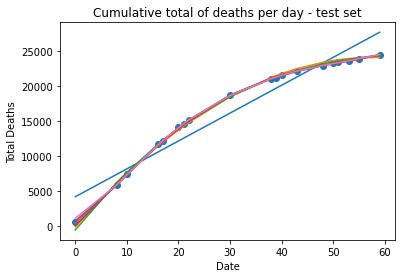

In [11]:
#Testing total
plt.scatter(day_test,total_test)
plt.plot(day_test,deg_1(day_test))
plt.plot(day_test,deg_2(day_test))
plt.plot(day_test,deg_3(day_test))
plt.plot(day_test,deg_4(day_test))
plt.plot(day_test,deg_5(day_test))
plt.plot(day_test,deg_7(day_test))
plt.plot(day_test,deg_10(day_test))

plt.title('Cumulative total of deaths per day - test set')
plt.xlabel('Date')
plt.ylabel('Total Deaths')
plt.savefig('Total_test.png')

([0.9983297497773982,
  0.9989145048059643,
  0.999650383011491,
  0.9998253470762971,
  0.9998693597781705,
  0.9998888645272513],
 [0.9976658618453367,
  0.998133972200975,
  0.9995112628958664,
  0.9998626579019096,
  0.9998614280327385,
  0.9995274717822132])

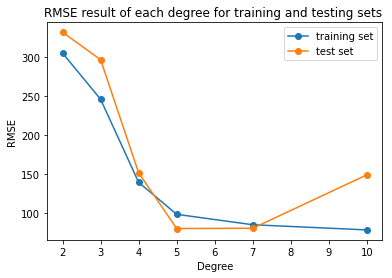

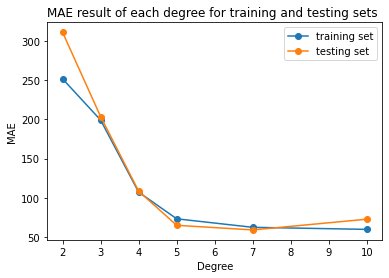

In [12]:
#Accuracy
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
degs = [2,3,4,5,7,10]

#MSE train
#deg1_MSE = mean_squared_error(total_test, deg_1(day_test))
deg2_MSE = mean_squared_error(total_train, deg_2(day_train))
deg3_MSE = mean_squared_error(total_train, deg_3(day_train))
deg4_MSE = mean_squared_error(total_train, deg_4(day_train))
deg5_MSE = mean_squared_error(total_train, deg_5(day_train))
deg7_MSE = mean_squared_error(total_train, deg_7(day_train))
deg10_MSE = mean_squared_error(total_train, deg_10(day_train))

train_MSE = [deg2_MSE,deg3_MSE,deg4_MSE,deg5_MSE,deg7_MSE,deg10_MSE]

#RMSE train
#deg1_RMSE = np.sqrt(deg1_MSE)
deg2_RMSE = np.sqrt(deg2_MSE)
deg3_RMSE = np.sqrt(deg3_MSE)
deg4_RMSE = np.sqrt(deg4_MSE)
deg5_RMSE = np.sqrt(deg5_MSE)
deg7_RMSE = np.sqrt(deg7_MSE)
deg10_RMSE = np.sqrt(deg10_MSE)

train_RMSE = [deg2_RMSE,deg3_RMSE,deg4_RMSE,deg5_RMSE,deg7_RMSE,deg10_RMSE]

#R squared train
#deg1_RS = r2_score(total_test, deg_1(day_test))
deg2_RS = r2_score(total_train, deg_2(day_train))
deg3_RS = r2_score(total_train, deg_3(day_train))
deg4_RS = r2_score(total_train, deg_4(day_train))
deg5_RS = r2_score(total_train, deg_5(day_train))
deg7_RS = r2_score(total_train, deg_7(day_train))
deg10_RS = r2_score(total_train, deg_10(day_train))

train_RS = [deg2_RS,deg3_RS,deg4_RS,deg5_RS,deg7_RS,deg10_RS]

#Mean absolute error train
#deg1_MAE = mean_absolute_error(total_test, deg_1(day_test))
deg2_MAE = mean_absolute_error(total_train, deg_2(day_train))
deg3_MAE = mean_absolute_error(total_train, deg_3(day_train))
deg4_MAE = mean_absolute_error(total_train, deg_4(day_train))
deg5_MAE = mean_absolute_error(total_train, deg_5(day_train))
deg7_MAE = mean_absolute_error(total_train, deg_7(day_train))
deg10_MAE = mean_absolute_error(total_train, deg_10(day_train))

train_MAE = [deg2_MAE,deg3_MAE,deg4_MAE,deg5_MAE,deg7_MAE,deg10_MAE]

#MSE test
#deg1_MSE = mean_squared_error(total_test, deg_1(day_test))
deg2_MSE = mean_squared_error(total_test, deg_2(day_test))
deg3_MSE = mean_squared_error(total_test, deg_3(day_test))
deg4_MSE = mean_squared_error(total_test, deg_4(day_test))
deg5_MSE = mean_squared_error(total_test, deg_5(day_test))
deg7_MSE = mean_squared_error(total_test, deg_7(day_test))
deg10_MSE = mean_squared_error(total_test, deg_10(day_test))

test_MSE = [deg2_MSE,deg3_MSE,deg4_MSE,deg5_MSE,deg7_MSE,deg10_MSE]

#RMSE test
#deg1_RMSE = np.sqrt(deg1_MSE)
deg2_RMSE = np.sqrt(deg2_MSE)
deg3_RMSE = np.sqrt(deg3_MSE)
deg4_RMSE = np.sqrt(deg4_MSE)
deg5_RMSE = np.sqrt(deg5_MSE)
deg7_RMSE = np.sqrt(deg7_MSE)
deg10_RMSE = np.sqrt(deg10_MSE)

test_RMSE = [deg2_RMSE,deg3_RMSE,deg4_RMSE,deg5_RMSE,deg7_RMSE,deg10_RMSE]

#R squared test
#deg1_RS = r2_score(total_test, deg_1(day_test))
deg2_RS = r2_score(total_test, deg_2(day_test))
deg3_RS = r2_score(total_test, deg_3(day_test))
deg4_RS = r2_score(total_test, deg_4(day_test))
deg5_RS = r2_score(total_test, deg_5(day_test))
deg7_RS = r2_score(total_test, deg_7(day_test))
deg10_RS = r2_score(total_test, deg_10(day_test))

test_RS = [deg2_RS,deg3_RS,deg4_RS,deg5_RS,deg7_RS,deg10_RS]

#Mean absolute error test
#deg1_MAE = mean_absolute_error(total_test, deg_1(day_test))
deg2_MAE = mean_absolute_error(total_test, deg_2(day_test))
deg3_MAE = mean_absolute_error(total_test, deg_3(day_test))
deg4_MAE = mean_absolute_error(total_test, deg_4(day_test))
deg5_MAE = mean_absolute_error(total_test, deg_5(day_test))
deg7_MAE = mean_absolute_error(total_test, deg_7(day_test))
deg10_MAE = mean_absolute_error(total_test, deg_10(day_test))

test_MAE = [deg2_MAE,deg3_MAE,deg4_MAE,deg5_MAE,deg7_MAE,deg10_MAE]

#RMSE for each degree, test and train diff
plt.figure()
plt.plot(degs,train_RMSE,'-o', label='training set')
plt.plot(degs,test_RMSE,'-o', label='test set')

plt.title('RMSE result of each degree for training and testing sets ')
plt.xlabel('Degree')
plt.ylabel('RMSE')
plt.legend()
plt.savefig('RMSE_total.png')

#MAE for each degree, test and train diff
plt.figure()
plt.plot(degs,train_MAE,'-o', label='training set')
plt.plot(degs,test_MAE,'-o', label='testing set')

plt.title('MAE result of each degree for training and testing sets ')
plt.xlabel('Degree')
plt.ylabel('MAE')
plt.legend()
plt.savefig('MAE_total.png')

#R^2 scores for train and test
train_RS,test_RS



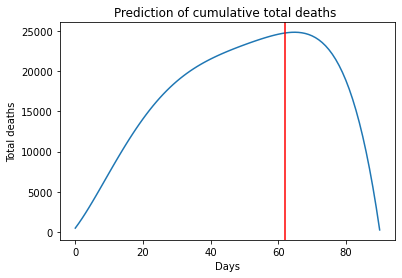

In [13]:
plt.plot(pred_days,deg_5(pred_days))
plt.axvline(62,color = 'red')

plt.title('Prediction of cumulative total deaths ')
plt.xlabel('Days')
plt.ylabel('Total deaths')
plt.savefig('pred_total.png')


## Band 1


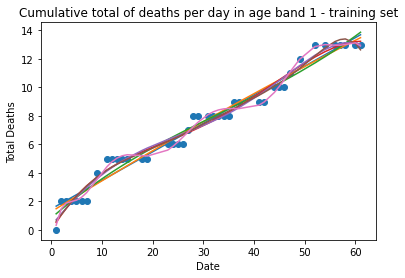

In [14]:
#Training band 1

deg_1 = np.poly1d(np.polyfit(day_train,band1_train,1))
deg_2 = np.poly1d(np.polyfit(day_train,band1_train,2))
deg_3 = np.poly1d(np.polyfit(day_train,band1_train,3))
deg_4 = np.poly1d(np.polyfit(day_train,band1_train,4))
deg_5 = np.poly1d(np.polyfit(day_train,band1_train,5))
deg_7 = np.poly1d(np.polyfit(day_train,band1_train,7))
deg_10 = np.poly1d(np.polyfit(day_train,band1_train,10))

#plt.bar(x,y)
plt.scatter(day_train,band1_train)
plt.plot(day_train,deg_1(day_train))
plt.plot(day_train,deg_2(day_train))
plt.plot(day_train,deg_3(day_train))
plt.plot(day_train,deg_4(day_train))
plt.plot(day_train,deg_5(day_train))
plt.plot(day_train,deg_7(day_train))
plt.plot(day_train,deg_10(day_train))

plt.title('Cumulative total of deaths per day in age band 1 - training set')
plt.xlabel('Date')
plt.ylabel('Total Deaths')
plt.savefig('Band1_train.png')

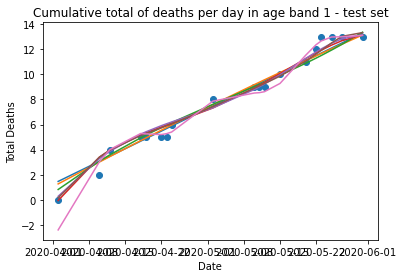

In [15]:
#Testing band 1
plt.scatter(date_test,band1_test)
plt.plot(date_test,deg_1(day_test))
plt.plot(date_test,deg_2(day_test))
plt.plot(date_test,deg_3(day_test))
plt.plot(date_test,deg_4(day_test))
plt.plot(date_test,deg_5(day_test))
plt.plot(date_test,deg_7(day_test))
plt.plot(date_test,deg_10(day_test))

plt.title('Cumulative total of deaths per day in age band 1 - test set')
plt.xlabel('Date')
plt.ylabel('Total Deaths')
plt.savefig('Band1_test.png')

([0.9704509256094057,
  0.9727932920546085,
  0.9789480992084982,
  0.9795757460968288,
  0.9811559776347213,
  0.9918210518561169],
 [0.9722905861038575,
  0.971192737152742,
  0.9785813039319113,
  0.9794545236854586,
  0.9807652863677283,
  0.9683117664468638])

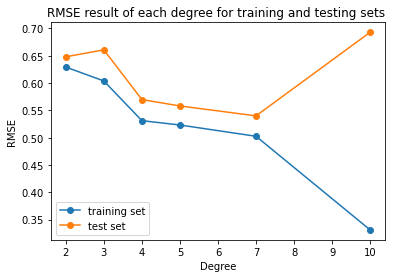

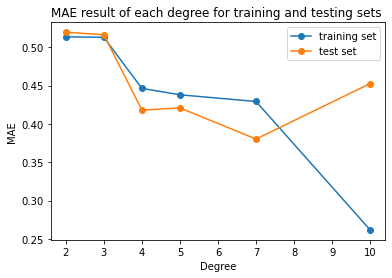

In [16]:
#Accuracy
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
degs = [2,3,4,5,7,10]

#MSE train
#deg1_MSE = mean_squared_error(band1_train, deg_1(day_test))
deg2_MSE = mean_squared_error(band1_train, deg_2(day_train))
deg3_MSE = mean_squared_error(band1_train, deg_3(day_train))
deg4_MSE = mean_squared_error(band1_train, deg_4(day_train))
deg5_MSE = mean_squared_error(band1_train, deg_5(day_train))
deg7_MSE = mean_squared_error(band1_train, deg_7(day_train))
deg10_MSE = mean_squared_error(band1_train, deg_10(day_train))

train_MSE = [deg2_MSE,deg3_MSE,deg4_MSE,deg5_MSE,deg7_MSE,deg10_MSE]

#RMSE train
#deg1_RMSE = np.sqrt(deg1_MSE)
deg2_RMSE = np.sqrt(deg2_MSE)
deg3_RMSE = np.sqrt(deg3_MSE)
deg4_RMSE = np.sqrt(deg4_MSE)
deg5_RMSE = np.sqrt(deg5_MSE)
deg7_RMSE = np.sqrt(deg7_MSE)
deg10_RMSE = np.sqrt(deg10_MSE)

train_RMSE = [deg2_RMSE,deg3_RMSE,deg4_RMSE,deg5_RMSE,deg7_RMSE,deg10_RMSE]

#R squared train
#deg1_RS = r2_score(total_test, deg_1(day_test))
deg2_RS = r2_score(band1_train, deg_2(day_train))
deg3_RS = r2_score(band1_train, deg_3(day_train))
deg4_RS = r2_score(band1_train, deg_4(day_train))
deg5_RS = r2_score(band1_train, deg_5(day_train))
deg7_RS = r2_score(band1_train, deg_7(day_train))
deg10_RS = r2_score(band1_train, deg_10(day_train))

train_RS = [deg2_RS,deg3_RS,deg4_RS,deg5_RS,deg7_RS,deg10_RS]

#Mean absolute error train
#deg1_MAE = mean_absolute_error(total_test, deg_1(day_test))
deg2_MAE = mean_absolute_error(band1_train, deg_2(day_train))
deg3_MAE = mean_absolute_error(band1_train, deg_3(day_train))
deg4_MAE = mean_absolute_error(band1_train, deg_4(day_train))
deg5_MAE = mean_absolute_error(band1_train, deg_5(day_train))
deg7_MAE = mean_absolute_error(band1_train, deg_7(day_train))
deg10_MAE = mean_absolute_error(band1_train, deg_10(day_train))

train_MAE = [deg2_MAE,deg3_MAE,deg4_MAE,deg5_MAE,deg7_MAE,deg10_MAE]

#MSE test
#deg1_MSE = mean_squared_error(band1_test, deg_1(day_test))
deg2_MSE = mean_squared_error(band1_test, deg_2(day_test))
deg3_MSE = mean_squared_error(band1_test, deg_3(day_test))
deg4_MSE = mean_squared_error(band1_test, deg_4(day_test))
deg5_MSE = mean_squared_error(band1_test, deg_5(day_test))
deg7_MSE = mean_squared_error(band1_test, deg_7(day_test))
deg10_MSE = mean_squared_error(band1_test, deg_10(day_test))

test_MSE = [deg2_MSE,deg3_MSE,deg4_MSE,deg5_MSE,deg7_MSE,deg10_MSE]

#RMSE test
#deg1_RMSE = np.sqrt(deg1_MSE)
deg2_RMSE = np.sqrt(deg2_MSE)
deg3_RMSE = np.sqrt(deg3_MSE)
deg4_RMSE = np.sqrt(deg4_MSE)
deg5_RMSE = np.sqrt(deg5_MSE)
deg7_RMSE = np.sqrt(deg7_MSE)
deg10_RMSE = np.sqrt(deg10_MSE)

test_RMSE = [deg2_RMSE,deg3_RMSE,deg4_RMSE,deg5_RMSE,deg7_RMSE,deg10_RMSE]

#R squared test
#deg1_RS = r2_score(total_test, deg_1(day_test))
deg2_RS = r2_score(band1_test, deg_2(day_test))
deg3_RS = r2_score(band1_test, deg_3(day_test))
deg4_RS = r2_score(band1_test, deg_4(day_test))
deg5_RS = r2_score(band1_test, deg_5(day_test))
deg7_RS = r2_score(band1_test, deg_7(day_test))
deg10_RS = r2_score(band1_test, deg_10(day_test))

test_RS = [deg2_RS,deg3_RS,deg4_RS,deg5_RS,deg7_RS,deg10_RS]

#Mean absolute error test
#deg1_MAE = mean_absolute_error(total_test, deg_1(day_test))
deg2_MAE = mean_absolute_error(band1_test, deg_2(day_test))
deg3_MAE = mean_absolute_error(band1_test, deg_3(day_test))
deg4_MAE = mean_absolute_error(band1_test, deg_4(day_test))
deg5_MAE = mean_absolute_error(band1_test, deg_5(day_test))
deg7_MAE = mean_absolute_error(band1_test, deg_7(day_test))
deg10_MAE = mean_absolute_error(band1_test, deg_10(day_test))

test_MAE = [deg2_MAE,deg3_MAE,deg4_MAE,deg5_MAE,deg7_MAE,deg10_MAE]

#RMSE for each degree, test and train diff
plt.figure()
plt.plot(degs,train_RMSE,'-o', label='training set')
plt.plot(degs,test_RMSE,'-o', label='test set')

plt.title('RMSE result of each degree for training and testing sets ')
plt.xlabel('Degree')
plt.ylabel('RMSE')
plt.legend()
plt.savefig('RMSE_band1.png')

#MAE for each degree, test and train diff
plt.figure()
plt.plot(degs,train_MAE,'-o', label='training set')
plt.plot(degs,test_MAE,'-o', label='test set')

plt.title('MAE result of each degree for training and testing sets ')
plt.xlabel('Degree')
plt.ylabel('MAE')
plt.legend()
plt.savefig('MAE_band1.png')

#R^2 scores for train and test
train_RS,test_RS



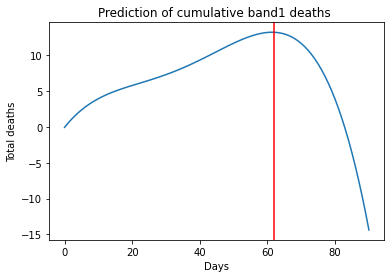

In [17]:
plt.plot(pred_days,deg_4(pred_days))
plt.axvline(62,color = 'red')

plt.title('Prediction of cumulative band1 deaths ')
plt.xlabel('Days')
plt.ylabel('Total deaths')
plt.savefig('pred_band1.png')

# Band 2


Text(0, 0.5, 'Total Deaths')

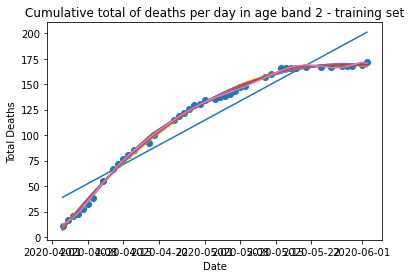

In [18]:
#Training band 2
deg_1 = np.poly1d(np.polyfit(day_train,band2_train,1))
deg_2 = np.poly1d(np.polyfit(day_train,band2_train,2))
deg_3 = np.poly1d(np.polyfit(day_train,band2_train,3))
deg_4 = np.poly1d(np.polyfit(day_train,band2_train,4))
deg_5 = np.poly1d(np.polyfit(day_train,band2_train,5))
deg_7 = np.poly1d(np.polyfit(day_train,band2_train,7))
deg_10 = np.poly1d(np.polyfit(day_train,band2_train,10))

#plt.bar(x,y)
plt.scatter(date_train,band2_train)
plt.plot(date_train,deg_1(day_train))
plt.plot(date_train,deg_2(day_train))
plt.plot(date_train,deg_3(day_train))
plt.plot(date_train,deg_4(day_train))
plt.plot(date_train,deg_5(day_train))
plt.plot(date_train,deg_7(day_train))
plt.plot(date_train,deg_10(day_train))

plt.title('Cumulative total of deaths per day in age band 2 - training set')
plt.xlabel('Date')
plt.ylabel('Total Deaths')

Text(0, 0.5, 'Total Deaths')

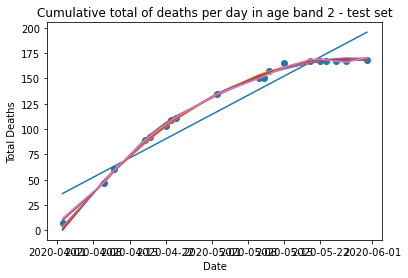

In [19]:
#Testing band 2
plt.scatter(date_test,band2_test)
plt.plot(date_test,deg_1(day_test))
plt.plot(date_test,deg_2(day_test))
plt.plot(date_test,deg_3(day_test))
plt.plot(date_test,deg_4(day_test))
plt.plot(date_test,deg_5(day_test))
plt.plot(date_test,deg_7(day_test))
plt.plot(date_test,deg_10(day_test))

plt.title('Cumulative total of deaths per day in age band 2 - test set')
plt.xlabel('Date')
plt.ylabel('Total Deaths')

([0.9966194858567531,
  0.9970932581982289,
  0.997103645848888,
  0.997228965892529,
  0.9985319283986588,
  0.9988656753173],
 [0.9974696150764926,
  0.9973372065515052,
  0.9972215691396493,
  0.9975929407932198,
  0.9981755553267798,
  0.9982328949788614])

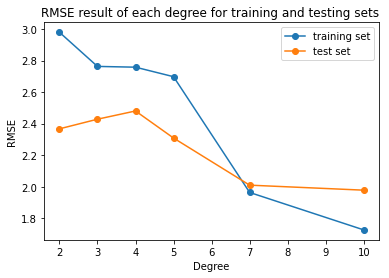

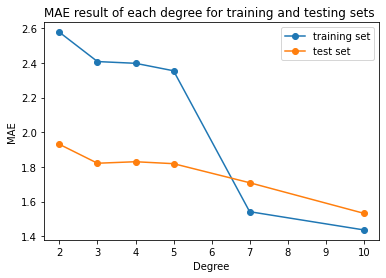

In [20]:
#Accuracy
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
degs = [2,3,4,5,7,10]

#MSE train
#deg1_MSE = mean_squared_error(band2_train, deg_1(day_test))
deg2_MSE = mean_squared_error(band2_train, deg_2(day_train))
deg3_MSE = mean_squared_error(band2_train, deg_3(day_train))
deg4_MSE = mean_squared_error(band2_train, deg_4(day_train))
deg5_MSE = mean_squared_error(band2_train, deg_5(day_train))
deg7_MSE = mean_squared_error(band2_train, deg_7(day_train))
deg10_MSE = mean_squared_error(band2_train, deg_10(day_train))

train_MSE = [deg2_MSE,deg3_MSE,deg4_MSE,deg5_MSE,deg7_MSE,deg10_MSE]

#RMSE train
#deg1_RMSE = np.sqrt(deg1_MSE)
deg2_RMSE = np.sqrt(deg2_MSE)
deg3_RMSE = np.sqrt(deg3_MSE)
deg4_RMSE = np.sqrt(deg4_MSE)
deg5_RMSE = np.sqrt(deg5_MSE)
deg7_RMSE = np.sqrt(deg7_MSE)
deg10_RMSE = np.sqrt(deg10_MSE)

train_RMSE = [deg2_RMSE,deg3_RMSE,deg4_RMSE,deg5_RMSE,deg7_RMSE,deg10_RMSE]

#R squared train
#deg1_RS = r2_score(band2_train, deg_1(day_test))
deg2_RS = r2_score(band2_train, deg_2(day_train))
deg3_RS = r2_score(band2_train, deg_3(day_train))
deg4_RS = r2_score(band2_train, deg_4(day_train))
deg5_RS = r2_score(band2_train, deg_5(day_train))
deg7_RS = r2_score(band2_train, deg_7(day_train))
deg10_RS = r2_score(band2_train, deg_10(day_train))

train_RS = [deg2_RS,deg3_RS,deg4_RS,deg5_RS,deg7_RS,deg10_RS]

#Mean absolute error train
#deg1_MAE = mean_absolute_error(band2_train, deg_1(day_test))
deg2_MAE = mean_absolute_error(band2_train, deg_2(day_train))
deg3_MAE = mean_absolute_error(band2_train, deg_3(day_train))
deg4_MAE = mean_absolute_error(band2_train, deg_4(day_train))
deg5_MAE = mean_absolute_error(band2_train, deg_5(day_train))
deg7_MAE = mean_absolute_error(band2_train, deg_7(day_train))
deg10_MAE = mean_absolute_error(band2_train, deg_10(day_train))

train_MAE = [deg2_MAE,deg3_MAE,deg4_MAE,deg5_MAE,deg7_MAE,deg10_MAE]

#MSE test
#deg1_MSE = mean_squared_error(band2_test, deg_1(day_test))
deg2_MSE = mean_squared_error(band2_test, deg_2(day_test))
deg3_MSE = mean_squared_error(band2_test, deg_3(day_test))
deg4_MSE = mean_squared_error(band2_test, deg_4(day_test))
deg5_MSE = mean_squared_error(band2_test, deg_5(day_test))
deg7_MSE = mean_squared_error(band2_test, deg_7(day_test))
deg10_MSE = mean_squared_error(band2_test, deg_10(day_test))

test_MSE = [deg2_MSE,deg3_MSE,deg4_MSE,deg5_MSE,deg7_MSE,deg10_MSE]

#RMSE test
#deg1_RMSE = np.sqrt(deg1_MSE)
deg2_RMSE = np.sqrt(deg2_MSE)
deg3_RMSE = np.sqrt(deg3_MSE)
deg4_RMSE = np.sqrt(deg4_MSE)
deg5_RMSE = np.sqrt(deg5_MSE)
deg7_RMSE = np.sqrt(deg7_MSE)
deg10_RMSE = np.sqrt(deg10_MSE)

test_RMSE = [deg2_RMSE,deg3_RMSE,deg4_RMSE,deg5_RMSE,deg7_RMSE,deg10_RMSE]

#R squared test
#deg1_RS = r2_score(band2_test, deg_1(day_test))
deg2_RS = r2_score(band2_test, deg_2(day_test))
deg3_RS = r2_score(band2_test, deg_3(day_test))
deg4_RS = r2_score(band2_test, deg_4(day_test))
deg5_RS = r2_score(band2_test, deg_5(day_test))
deg7_RS = r2_score(band2_test, deg_7(day_test))
deg10_RS = r2_score(band2_test, deg_10(day_test))

test_RS = [deg2_RS,deg3_RS,deg4_RS,deg5_RS,deg7_RS,deg10_RS]

#Mean absolute error test
#deg1_MAE = mean_absolute_error(total_test, deg_1(day_test))
deg2_MAE = mean_absolute_error(band2_test, deg_2(day_test))
deg3_MAE = mean_absolute_error(band2_test, deg_3(day_test))
deg4_MAE = mean_absolute_error(band2_test, deg_4(day_test))
deg5_MAE = mean_absolute_error(band2_test, deg_5(day_test))
deg7_MAE = mean_absolute_error(band2_test, deg_7(day_test))
deg10_MAE = mean_absolute_error(band2_test, deg_10(day_test))

test_MAE = [deg2_MAE,deg3_MAE,deg4_MAE,deg5_MAE,deg7_MAE,deg10_MAE]

#RMSE for each degree, test and train diff
plt.figure()
plt.plot(degs,train_RMSE,'-o', label='training set')
plt.plot(degs,test_RMSE,'-o', label='test set')

plt.title('RMSE result of each degree for training and testing sets ')
plt.xlabel('Degree')
plt.ylabel('RMSE')
plt.legend()
plt.savefig('RMSE_band2.png')

#MAE for each degree, test and train diff
plt.figure()
plt.plot(degs,train_MAE,'-o', label='training set')
plt.plot(degs,test_MAE,'-o', label='test set')

plt.title('MAE result of each degree for training and testing sets ')
plt.xlabel('Degree')
plt.ylabel('MAE')
plt.legend()
plt.savefig('MAE_band2.png')


#R^2 scores for train and test
train_RS,test_RS

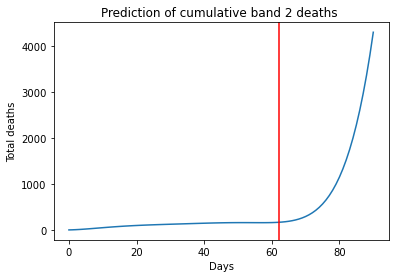

In [21]:
plt.plot(pred_days,deg_7(pred_days))
plt.axvline(62,color = 'red')

plt.title('Prediction of cumulative band 2 deaths ')
plt.xlabel('Days')
plt.ylabel('Total deaths')
plt.savefig('pred_band2.png')


# Band 3

Text(0, 0.5, 'Total Deaths')

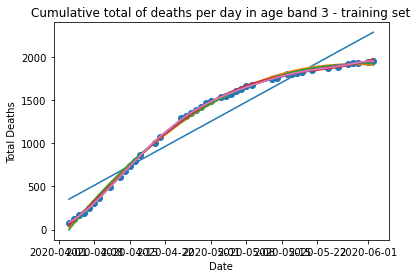

In [22]:
#Training band 3

deg_1 = np.poly1d(np.polyfit(day_train,band3_train,1))
deg_2 = np.poly1d(np.polyfit(day_train,band3_train,2))
deg_3 = np.poly1d(np.polyfit(day_train,band3_train,3))
deg_4 = np.poly1d(np.polyfit(day_train,band3_train,4))
deg_5 = np.poly1d(np.polyfit(day_train,band3_train,5))
deg_7 = np.poly1d(np.polyfit(day_train,band3_train,7))
deg_10 = np.poly1d(np.polyfit(day_train,band3_train,10))

#plt.bar(x,y)
plt.scatter(date_train,band3_train)
plt.plot(date_train,deg_1(day_train))
plt.plot(date_train,deg_2(day_train))
plt.plot(date_train,deg_3(day_train))
plt.plot(date_train,deg_4(day_train))
plt.plot(date_train,deg_5(day_train))
plt.plot(date_train,deg_7(day_train))
plt.plot(date_train,deg_10(day_train))

plt.title('Cumulative total of deaths per day in age band 3 - training set')
plt.xlabel('Date')
plt.ylabel('Total Deaths')

Text(0, 0.5, 'Total Deaths')

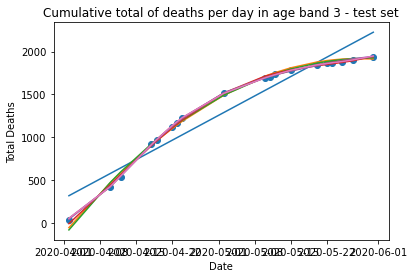

In [23]:
#Testing band 3

plt.scatter(date_test,band3_test)
plt.plot(date_test,deg_1(day_test))
plt.plot(date_test,deg_2(day_test))
plt.plot(date_test,deg_3(day_test))
plt.plot(date_test,deg_4(day_test))
plt.plot(date_test,deg_5(day_test))
plt.plot(date_test,deg_7(day_test))
plt.plot(date_test,deg_10(day_test))

plt.title('Cumulative total of deaths per day in age band 3 - test set')
plt.xlabel('Date')
plt.ylabel('Total Deaths')

([0.9973629803666748,
  0.99766602735768,
  0.9991974519210517,
  0.999708491551337,
  0.9997949949874377,
  0.9998254348881073],
 [0.9959996894322833,
  0.9959684752086139,
  0.9988970383126885,
  0.9997859999747812,
  0.9997713399815626,
  0.9997695716513768])

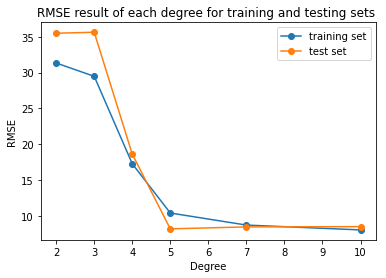

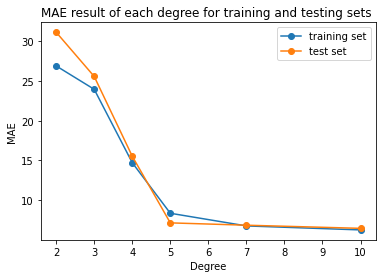

In [24]:
#Accuracy
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
degs = [2,3,4,5,7,10]

#MSE train
#deg1_MSE = mean_squared_error(band3_train, deg_1(day_test))
deg2_MSE = mean_squared_error(band3_train, deg_2(day_train))
deg3_MSE = mean_squared_error(band3_train, deg_3(day_train))
deg4_MSE = mean_squared_error(band3_train, deg_4(day_train))
deg5_MSE = mean_squared_error(band3_train, deg_5(day_train))
deg7_MSE = mean_squared_error(band3_train, deg_7(day_train))
deg10_MSE = mean_squared_error(band3_train, deg_10(day_train))

train_MSE = [deg2_MSE,deg3_MSE,deg4_MSE,deg5_MSE,deg7_MSE,deg10_MSE]

#RMSE train
#deg1_RMSE = np.sqrt(deg1_MSE)
deg2_RMSE = np.sqrt(deg2_MSE)
deg3_RMSE = np.sqrt(deg3_MSE)
deg4_RMSE = np.sqrt(deg4_MSE)
deg5_RMSE = np.sqrt(deg5_MSE)
deg7_RMSE = np.sqrt(deg7_MSE)
deg10_RMSE = np.sqrt(deg10_MSE)

train_RMSE = [deg2_RMSE,deg3_RMSE,deg4_RMSE,deg5_RMSE,deg7_RMSE,deg10_RMSE]

#R squared train
#deg1_RS = r2_score(band3_train, deg_1(day_test))
deg2_RS = r2_score(band3_train, deg_2(day_train))
deg3_RS = r2_score(band3_train, deg_3(day_train))
deg4_RS = r2_score(band3_train, deg_4(day_train))
deg5_RS = r2_score(band3_train, deg_5(day_train))
deg7_RS = r2_score(band3_train, deg_7(day_train))
deg10_RS = r2_score(band3_train, deg_10(day_train))

train_RS = [deg2_RS,deg3_RS,deg4_RS,deg5_RS,deg7_RS,deg10_RS]

#Mean absolute error train
#deg1_MAE = mean_absolute_error(band3_train, deg_1(day_test))
deg2_MAE = mean_absolute_error(band3_train, deg_2(day_train))
deg3_MAE = mean_absolute_error(band3_train, deg_3(day_train))
deg4_MAE = mean_absolute_error(band3_train, deg_4(day_train))
deg5_MAE = mean_absolute_error(band3_train, deg_5(day_train))
deg7_MAE = mean_absolute_error(band3_train, deg_7(day_train))
deg10_MAE = mean_absolute_error(band3_train, deg_10(day_train))

train_MAE = [deg2_MAE,deg3_MAE,deg4_MAE,deg5_MAE,deg7_MAE,deg10_MAE]

#MSE test
#deg1_MSE = mean_squared_error(band3_test, deg_1(day_test))
deg2_MSE = mean_squared_error(band3_test, deg_2(day_test))
deg3_MSE = mean_squared_error(band3_test, deg_3(day_test))
deg4_MSE = mean_squared_error(band3_test, deg_4(day_test))
deg5_MSE = mean_squared_error(band3_test, deg_5(day_test))
deg7_MSE = mean_squared_error(band3_test, deg_7(day_test))
deg10_MSE = mean_squared_error(band3_test, deg_10(day_test))

test_MSE = [deg2_MSE,deg3_MSE,deg4_MSE,deg5_MSE,deg7_MSE,deg10_MSE]

#RMSE test
#deg1_RMSE = np.sqrt(deg1_MSE)
deg2_RMSE = np.sqrt(deg2_MSE)
deg3_RMSE = np.sqrt(deg3_MSE)
deg4_RMSE = np.sqrt(deg4_MSE)
deg5_RMSE = np.sqrt(deg5_MSE)
deg7_RMSE = np.sqrt(deg7_MSE)
deg10_RMSE = np.sqrt(deg10_MSE)

test_RMSE = [deg2_RMSE,deg3_RMSE,deg4_RMSE,deg5_RMSE,deg7_RMSE,deg10_RMSE]

#R squared test
#deg1_RS = r2_score(band3_test, deg_1(day_test))
deg2_RS = r2_score(band3_test, deg_2(day_test))
deg3_RS = r2_score(band3_test, deg_3(day_test))
deg4_RS = r2_score(band3_test, deg_4(day_test))
deg5_RS = r2_score(band3_test, deg_5(day_test))
deg7_RS = r2_score(band3_test, deg_7(day_test))
deg10_RS = r2_score(band3_test, deg_10(day_test))

test_RS = [deg2_RS,deg3_RS,deg4_RS,deg5_RS,deg7_RS,deg10_RS]

#Mean absolute error test
#deg1_MAE = mean_absolute_error(total_test, deg_1(day_test))
deg2_MAE = mean_absolute_error(band3_test, deg_2(day_test))
deg3_MAE = mean_absolute_error(band3_test, deg_3(day_test))
deg4_MAE = mean_absolute_error(band3_test, deg_4(day_test))
deg5_MAE = mean_absolute_error(band3_test, deg_5(day_test))
deg7_MAE = mean_absolute_error(band3_test, deg_7(day_test))
deg10_MAE = mean_absolute_error(band3_test, deg_10(day_test))

test_MAE = [deg2_MAE,deg3_MAE,deg4_MAE,deg5_MAE,deg7_MAE,deg10_MAE]

#RMSE for each degree, test and train diff
plt.figure()
plt.plot(degs,train_RMSE,'-o', label='training set')
plt.plot(degs,test_RMSE,'-o', label='test set')

plt.title('RMSE result of each degree for training and testing sets ')
plt.xlabel('Degree')
plt.ylabel('RMSE')
plt.legend()
plt.savefig('RMSE_band3.png')

#MAE for each degree, test and train diff
plt.figure()
plt.plot(degs,train_MAE,'-o', label='training set')
plt.plot(degs,test_MAE,'-o', label='test set')

plt.title('MAE result of each degree for training and testing sets ')
plt.xlabel('Degree')
plt.ylabel('MAE')
plt.legend()
plt.savefig('MAE_band3.png')

#R^2 scores for train and test
train_RS,test_RS

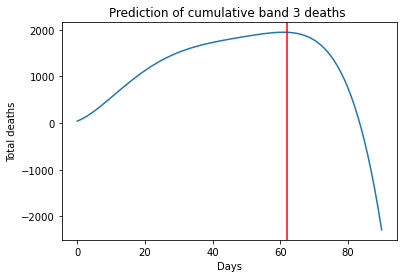

In [25]:
plt.plot(pred_days,deg_5(pred_days))
plt.axvline(62,color = 'red')

plt.title('Prediction of cumulative band 3 deaths ')
plt.xlabel('Days')
plt.ylabel('Total deaths')
plt.savefig('pred_band3.png')


# Band 4

Text(0, 0.5, 'Total Deaths')

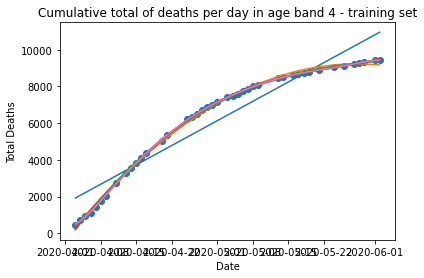

In [26]:
#Training band 4

deg_1 = np.poly1d(np.polyfit(day_train,band4_train,1))
deg_2 = np.poly1d(np.polyfit(day_train,band4_train,2))
deg_3 = np.poly1d(np.polyfit(day_train,band4_train,3))
deg_4 = np.poly1d(np.polyfit(day_train,band4_train,4))
deg_5 = np.poly1d(np.polyfit(day_train,band4_train,5))
deg_7 = np.poly1d(np.polyfit(day_train,band4_train,7))
deg_10 = np.poly1d(np.polyfit(day_train,band4_train,10))

#plt.bar(x,y)
plt.scatter(date_train,band4_train)
plt.plot(date_train,deg_1(day_train))
plt.plot(date_train,deg_2(day_train))
plt.plot(date_train,deg_3(day_train))
plt.plot(date_train,deg_4(day_train))
plt.plot(date_train,deg_5(day_train))
plt.plot(date_train,deg_7(day_train))
plt.plot(date_train,deg_10(day_train))

plt.title('Cumulative total of deaths per day in age band 4 - training set')
plt.xlabel('Date')
plt.ylabel('Total Deaths')

Text(0, 0.5, 'Total Deaths')

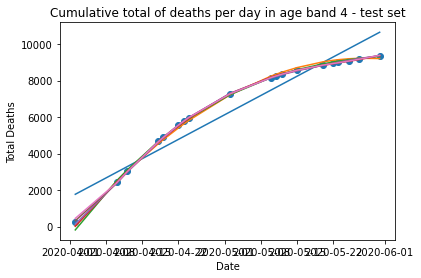

In [27]:
#Testing band 4

plt.scatter(date_test,band4_test)
plt.plot(date_test,deg_1(day_test))
plt.plot(date_test,deg_2(day_test))
plt.plot(date_test,deg_3(day_test))
plt.plot(date_test,deg_4(day_test))
plt.plot(date_test,deg_5(day_test))
plt.plot(date_test,deg_7(day_test))
plt.plot(date_test,deg_10(day_test))

plt.title('Cumulative total of deaths per day in age band 4 - test set')
plt.xlabel('Date')
plt.ylabel('Total Deaths')

([0.9980569947937328,
  0.9991067889883476,
  0.9996267324992167,
  0.9997707158160088,
  0.9998685468341074,
  0.999884350377523],
 [0.9973183438692266,
  0.9981666465416758,
  0.9993723858336963,
  0.9997402841732954,
  0.9998619352657234,
  0.9995926309590676])

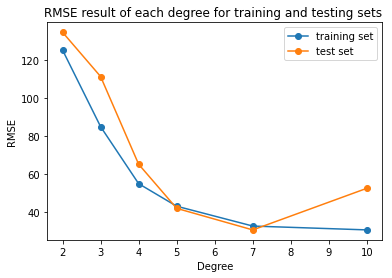

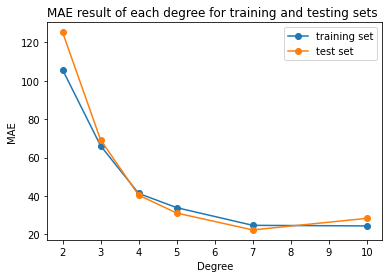

In [28]:
#Accuracy
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
degs = [2,3,4,5,7,10]

#MSE train
#deg1_MSE = mean_squared_error(band4_train, deg_1(day_test))
deg2_MSE = mean_squared_error(band4_train, deg_2(day_train))
deg3_MSE = mean_squared_error(band4_train, deg_3(day_train))
deg4_MSE = mean_squared_error(band4_train, deg_4(day_train))
deg5_MSE = mean_squared_error(band4_train, deg_5(day_train))
deg7_MSE = mean_squared_error(band4_train, deg_7(day_train))
deg10_MSE = mean_squared_error(band4_train, deg_10(day_train))

train_MSE = [deg2_MSE,deg3_MSE,deg4_MSE,deg5_MSE,deg7_MSE,deg10_MSE]

#RMSE train
#deg1_RMSE = np.sqrt(deg1_MSE)
deg2_RMSE = np.sqrt(deg2_MSE)
deg3_RMSE = np.sqrt(deg3_MSE)
deg4_RMSE = np.sqrt(deg4_MSE)
deg5_RMSE = np.sqrt(deg5_MSE)
deg7_RMSE = np.sqrt(deg7_MSE)
deg10_RMSE = np.sqrt(deg10_MSE)

train_RMSE = [deg2_RMSE,deg3_RMSE,deg4_RMSE,deg5_RMSE,deg7_RMSE,deg10_RMSE]

#R squared train
#deg1_RS = r2_score(band4_train, deg_1(day_test))
deg2_RS = r2_score(band4_train, deg_2(day_train))
deg3_RS = r2_score(band4_train, deg_3(day_train))
deg4_RS = r2_score(band4_train, deg_4(day_train))
deg5_RS = r2_score(band4_train, deg_5(day_train))
deg7_RS = r2_score(band4_train, deg_7(day_train))
deg10_RS = r2_score(band4_train, deg_10(day_train))

train_RS = [deg2_RS,deg3_RS,deg4_RS,deg5_RS,deg7_RS,deg10_RS]

#Mean absolute error train
#deg1_MAE = mean_absolute_error(band4_train, deg_1(day_test))
deg2_MAE = mean_absolute_error(band4_train, deg_2(day_train))
deg3_MAE = mean_absolute_error(band4_train, deg_3(day_train))
deg4_MAE = mean_absolute_error(band4_train, deg_4(day_train))
deg5_MAE = mean_absolute_error(band4_train, deg_5(day_train))
deg7_MAE = mean_absolute_error(band4_train, deg_7(day_train))
deg10_MAE = mean_absolute_error(band4_train, deg_10(day_train))

train_MAE = [deg2_MAE,deg3_MAE,deg4_MAE,deg5_MAE,deg7_MAE,deg10_MAE]

#MSE test
#deg1_MSE = mean_squared_error(band4_test, deg_1(day_test))
deg2_MSE = mean_squared_error(band4_test, deg_2(day_test))
deg3_MSE = mean_squared_error(band4_test, deg_3(day_test))
deg4_MSE = mean_squared_error(band4_test, deg_4(day_test))
deg5_MSE = mean_squared_error(band4_test, deg_5(day_test))
deg7_MSE = mean_squared_error(band4_test, deg_7(day_test))
deg10_MSE = mean_squared_error(band4_test, deg_10(day_test))

test_MSE = [deg2_MSE,deg3_MSE,deg4_MSE,deg5_MSE,deg7_MSE,deg10_MSE]

#RMSE test
#deg1_RMSE = np.sqrt(deg1_MSE)
deg2_RMSE = np.sqrt(deg2_MSE)
deg3_RMSE = np.sqrt(deg3_MSE)
deg4_RMSE = np.sqrt(deg4_MSE)
deg5_RMSE = np.sqrt(deg5_MSE)
deg7_RMSE = np.sqrt(deg7_MSE)
deg10_RMSE = np.sqrt(deg10_MSE)

test_RMSE = [deg2_RMSE,deg3_RMSE,deg4_RMSE,deg5_RMSE,deg7_RMSE,deg10_RMSE]

#R squared test
#deg1_RS = r2_score(band3_test, deg_1(day_test))
deg2_RS = r2_score(band4_test, deg_2(day_test))
deg3_RS = r2_score(band4_test, deg_3(day_test))
deg4_RS = r2_score(band4_test, deg_4(day_test))
deg5_RS = r2_score(band4_test, deg_5(day_test))
deg7_RS = r2_score(band4_test, deg_7(day_test))
deg10_RS = r2_score(band4_test, deg_10(day_test))

test_RS = [deg2_RS,deg3_RS,deg4_RS,deg5_RS,deg7_RS,deg10_RS]

#Mean absolute error test
#deg1_MAE = mean_absolute_error(total_test, deg_1(day_test))
deg2_MAE = mean_absolute_error(band4_test, deg_2(day_test))
deg3_MAE = mean_absolute_error(band4_test, deg_3(day_test))
deg4_MAE = mean_absolute_error(band4_test, deg_4(day_test))
deg5_MAE = mean_absolute_error(band4_test, deg_5(day_test))
deg7_MAE = mean_absolute_error(band4_test, deg_7(day_test))
deg10_MAE = mean_absolute_error(band4_test, deg_10(day_test))

test_MAE = [deg2_MAE,deg3_MAE,deg4_MAE,deg5_MAE,deg7_MAE,deg10_MAE]

#RMSE for each degree, test and train diff
plt.figure()
plt.plot(degs,train_RMSE,'-o', label='training set')
plt.plot(degs,test_RMSE,'-o', label='test set')

plt.title('RMSE result of each degree for training and testing sets ')
plt.xlabel('Degree')
plt.ylabel('RMSE')
plt.legend()
plt.savefig('RMSE_band4.png')

#MAE for each degree, test and train diff
plt.figure()
plt.plot(degs,train_MAE,'-o', label='training set')
plt.plot(degs,test_MAE,'-o', label='test set')

plt.title('MAE result of each degree for training and testing sets ')
plt.xlabel('Degree')
plt.ylabel('MAE')
plt.legend()
plt.savefig('MAE_band4.png')

#R^2 scores for train and test
train_RS,test_RS

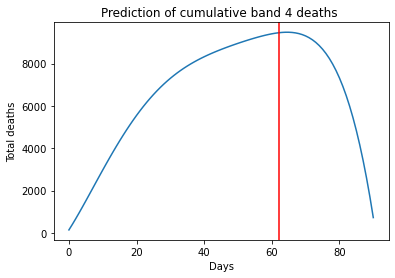

In [29]:
plt.plot(pred_days,deg_5(pred_days))
plt.axvline(62,color = 'red')

plt.title('Prediction of cumulative band 4 deaths ')
plt.xlabel('Days')
plt.ylabel('Total deaths')
plt.savefig('pred_band4.png')

# Band 5

Text(0, 0.5, 'Total Deaths')

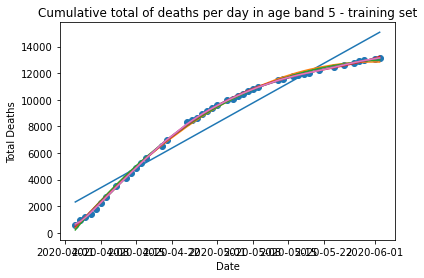

In [30]:
#Training band 5

deg_1 = np.poly1d(np.polyfit(day_train,band5_train,1))
deg_2 = np.poly1d(np.polyfit(day_train,band5_train,2))
deg_3 = np.poly1d(np.polyfit(day_train,band5_train,3))
deg_4 = np.poly1d(np.polyfit(day_train,band5_train,4))
deg_5 = np.poly1d(np.polyfit(day_train,band5_train,5))
deg_7 = np.poly1d(np.polyfit(day_train,band5_train,7))
deg_10 = np.poly1d(np.polyfit(day_train,band5_train,10))

#plt.bar(x,y)
plt.scatter(date_train,band5_train)
plt.plot(date_train,deg_1(day_train))
plt.plot(date_train,deg_2(day_train))
plt.plot(date_train,deg_3(day_train))
plt.plot(date_train,deg_4(day_train))
plt.plot(date_train,deg_5(day_train))
plt.plot(date_train,deg_7(day_train))
plt.plot(date_train,deg_10(day_train))

plt.title('Cumulative total of deaths per day in age band 5 - training set')
plt.xlabel('Date')
plt.ylabel('Total Deaths')

Text(0, 0.5, 'Total Deaths')

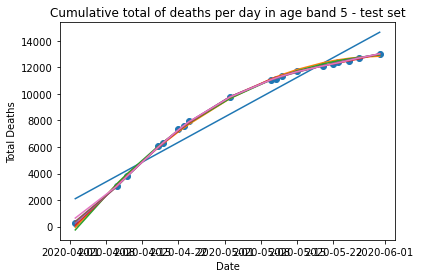

In [31]:
#Testing band 5

plt.scatter(date_test,band5_test)
plt.plot(date_test,deg_1(day_test))
plt.plot(date_test,deg_2(day_test))
plt.plot(date_test,deg_3(day_test))
plt.plot(date_test,deg_4(day_test))
plt.plot(date_test,deg_5(day_test))
plt.plot(date_test,deg_7(day_test))
plt.plot(date_test,deg_10(day_test))

plt.title('Cumulative total of deaths per day in age band 5 - test set')
plt.xlabel('Date')
plt.ylabel('Total Deaths')

([0.9984747637076492,
  0.9988489138714415,
  0.9996814508147316,
  0.9998421113249613,
  0.9998588525708788,
  0.9998851914565161],
 [0.9979130825795991,
  0.9982642428104018,
  0.9995906549033401,
  0.9998649412989346,
  0.9998333455154182,
  0.9993699932884177])

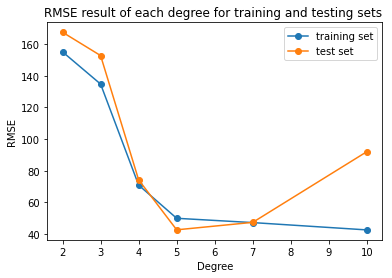

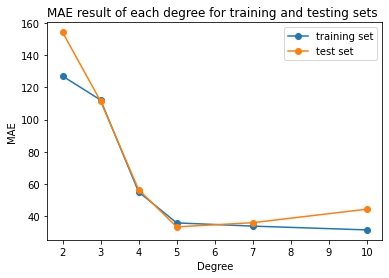

In [32]:
#Accuracy
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
degs = [2,3,4,5,7,10]

#MSE train
#deg1_MSE = mean_squared_error(band5_train, deg_1(day_test))
deg2_MSE = mean_squared_error(band5_train, deg_2(day_train))
deg3_MSE = mean_squared_error(band5_train, deg_3(day_train))
deg4_MSE = mean_squared_error(band5_train, deg_4(day_train))
deg5_MSE = mean_squared_error(band5_train, deg_5(day_train))
deg7_MSE = mean_squared_error(band5_train, deg_7(day_train))
deg10_MSE = mean_squared_error(band5_train, deg_10(day_train))

train_MSE = [deg2_MSE,deg3_MSE,deg4_MSE,deg5_MSE,deg7_MSE,deg10_MSE]

#RMSE train
#deg1_RMSE = np.sqrt(deg1_MSE)
deg2_RMSE = np.sqrt(deg2_MSE)
deg3_RMSE = np.sqrt(deg3_MSE)
deg4_RMSE = np.sqrt(deg4_MSE)
deg5_RMSE = np.sqrt(deg5_MSE)
deg7_RMSE = np.sqrt(deg7_MSE)
deg10_RMSE = np.sqrt(deg10_MSE)

train_RMSE = [deg2_RMSE,deg3_RMSE,deg4_RMSE,deg5_RMSE,deg7_RMSE,deg10_RMSE]

#R squared train
#deg1_RS = r2_score(band5_train, deg_1(day_test))
deg2_RS = r2_score(band5_train, deg_2(day_train))
deg3_RS = r2_score(band5_train, deg_3(day_train))
deg4_RS = r2_score(band5_train, deg_4(day_train))
deg5_RS = r2_score(band5_train, deg_5(day_train))
deg7_RS = r2_score(band5_train, deg_7(day_train))
deg10_RS = r2_score(band5_train, deg_10(day_train))

train_RS = [deg2_RS,deg3_RS,deg4_RS,deg5_RS,deg7_RS,deg10_RS]

#Mean absolute error train
#deg1_MAE = mean_absolute_error(band4_train, deg_1(day_test))
deg2_MAE = mean_absolute_error(band5_train, deg_2(day_train))
deg3_MAE = mean_absolute_error(band5_train, deg_3(day_train))
deg4_MAE = mean_absolute_error(band5_train, deg_4(day_train))
deg5_MAE = mean_absolute_error(band5_train, deg_5(day_train))
deg7_MAE = mean_absolute_error(band5_train, deg_7(day_train))
deg10_MAE = mean_absolute_error(band5_train, deg_10(day_train))

train_MAE = [deg2_MAE,deg3_MAE,deg4_MAE,deg5_MAE,deg7_MAE,deg10_MAE]

#MSE test
#deg1_MSE = mean_squared_error(band5_test, deg_1(day_test))
deg2_MSE = mean_squared_error(band5_test, deg_2(day_test))
deg3_MSE = mean_squared_error(band5_test, deg_3(day_test))
deg4_MSE = mean_squared_error(band5_test, deg_4(day_test))
deg5_MSE = mean_squared_error(band5_test, deg_5(day_test))
deg7_MSE = mean_squared_error(band5_test, deg_7(day_test))
deg10_MSE = mean_squared_error(band5_test, deg_10(day_test))

test_MSE = [deg2_MSE,deg3_MSE,deg4_MSE,deg5_MSE,deg7_MSE,deg10_MSE]

#RMSE test
#deg1_RMSE = np.sqrt(deg1_MSE)
deg2_RMSE = np.sqrt(deg2_MSE)
deg3_RMSE = np.sqrt(deg3_MSE)
deg4_RMSE = np.sqrt(deg4_MSE)
deg5_RMSE = np.sqrt(deg5_MSE)
deg7_RMSE = np.sqrt(deg7_MSE)
deg10_RMSE = np.sqrt(deg10_MSE)

test_RMSE = [deg2_RMSE,deg3_RMSE,deg4_RMSE,deg5_RMSE,deg7_RMSE,deg10_RMSE]

#R squared test
#deg1_RS = r2_score(band5_test, deg_1(day_test))
deg2_RS = r2_score(band5_test, deg_2(day_test))
deg3_RS = r2_score(band5_test, deg_3(day_test))
deg4_RS = r2_score(band5_test, deg_4(day_test))
deg5_RS = r2_score(band5_test, deg_5(day_test))
deg7_RS = r2_score(band5_test, deg_7(day_test))
deg10_RS = r2_score(band5_test, deg_10(day_test))

test_RS = [deg2_RS,deg3_RS,deg4_RS,deg5_RS,deg7_RS,deg10_RS]

#Mean absolute error test
#deg1_MAE = mean_absolute_error(total_test, deg_1(day_test))
deg2_MAE = mean_absolute_error(band5_test, deg_2(day_test))
deg3_MAE = mean_absolute_error(band5_test, deg_3(day_test))
deg4_MAE = mean_absolute_error(band5_test, deg_4(day_test))
deg5_MAE = mean_absolute_error(band5_test, deg_5(day_test))
deg7_MAE = mean_absolute_error(band5_test, deg_7(day_test))
deg10_MAE = mean_absolute_error(band5_test, deg_10(day_test))

test_MAE = [deg2_MAE,deg3_MAE,deg4_MAE,deg5_MAE,deg7_MAE,deg10_MAE]

#RMSE for each degree, test and train diff
plt.figure()
plt.plot(degs,train_RMSE,'-o', label='training set')
plt.plot(degs,test_RMSE,'-o', label='test set')

plt.title('RMSE result of each degree for training and testing sets ')
plt.xlabel('Degree')
plt.ylabel('RMSE')
plt.legend()
plt.savefig('RMSE_band5.png')

#MAE for each degree, test and train diff
plt.figure()
plt.plot(degs,train_MAE,'-o', label='training set')
plt.plot(degs,test_MAE,'-o', label='test set')

plt.title('MAE result of each degree for training and testing sets ')
plt.xlabel('Degree')
plt.ylabel('MAE')
plt.legend()
plt.savefig('MAE_band5.png')

#R^2 scores for train and test
train_RS,test_RS

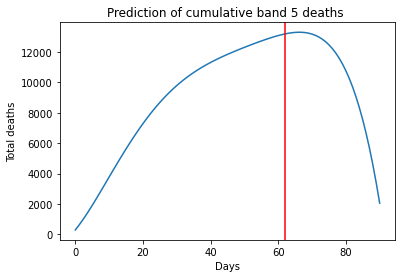

In [33]:
plt.plot(pred_days,deg_5(pred_days))
plt.axvline(62,color = 'red')

plt.title('Prediction of cumulative band 5 deaths ')
plt.xlabel('Days')
plt.ylabel('Total deaths')
plt.savefig('pred_band5.png')